#  Project 4 - Housing Price

In this project, we are goint to predict housing price based on 79 real estate features. Our approach is as follows:
1. Conducting EDA and feature engineering
2. Forming models
3. submit test score
4. Introducing model application in real life

Note that the Potion below documented our optimal solution. Many ideas were tried but didn't work well, those are presented in the PPT.

### 1. EDA and Feature Engineering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import time
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pandas as pd
from dython import nominal
from joblib import dump, load
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import BayesianRidge
sb.set(color_codes=True)

In [15]:
# A peek of data
data=pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Numeric Feature ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Feature ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',

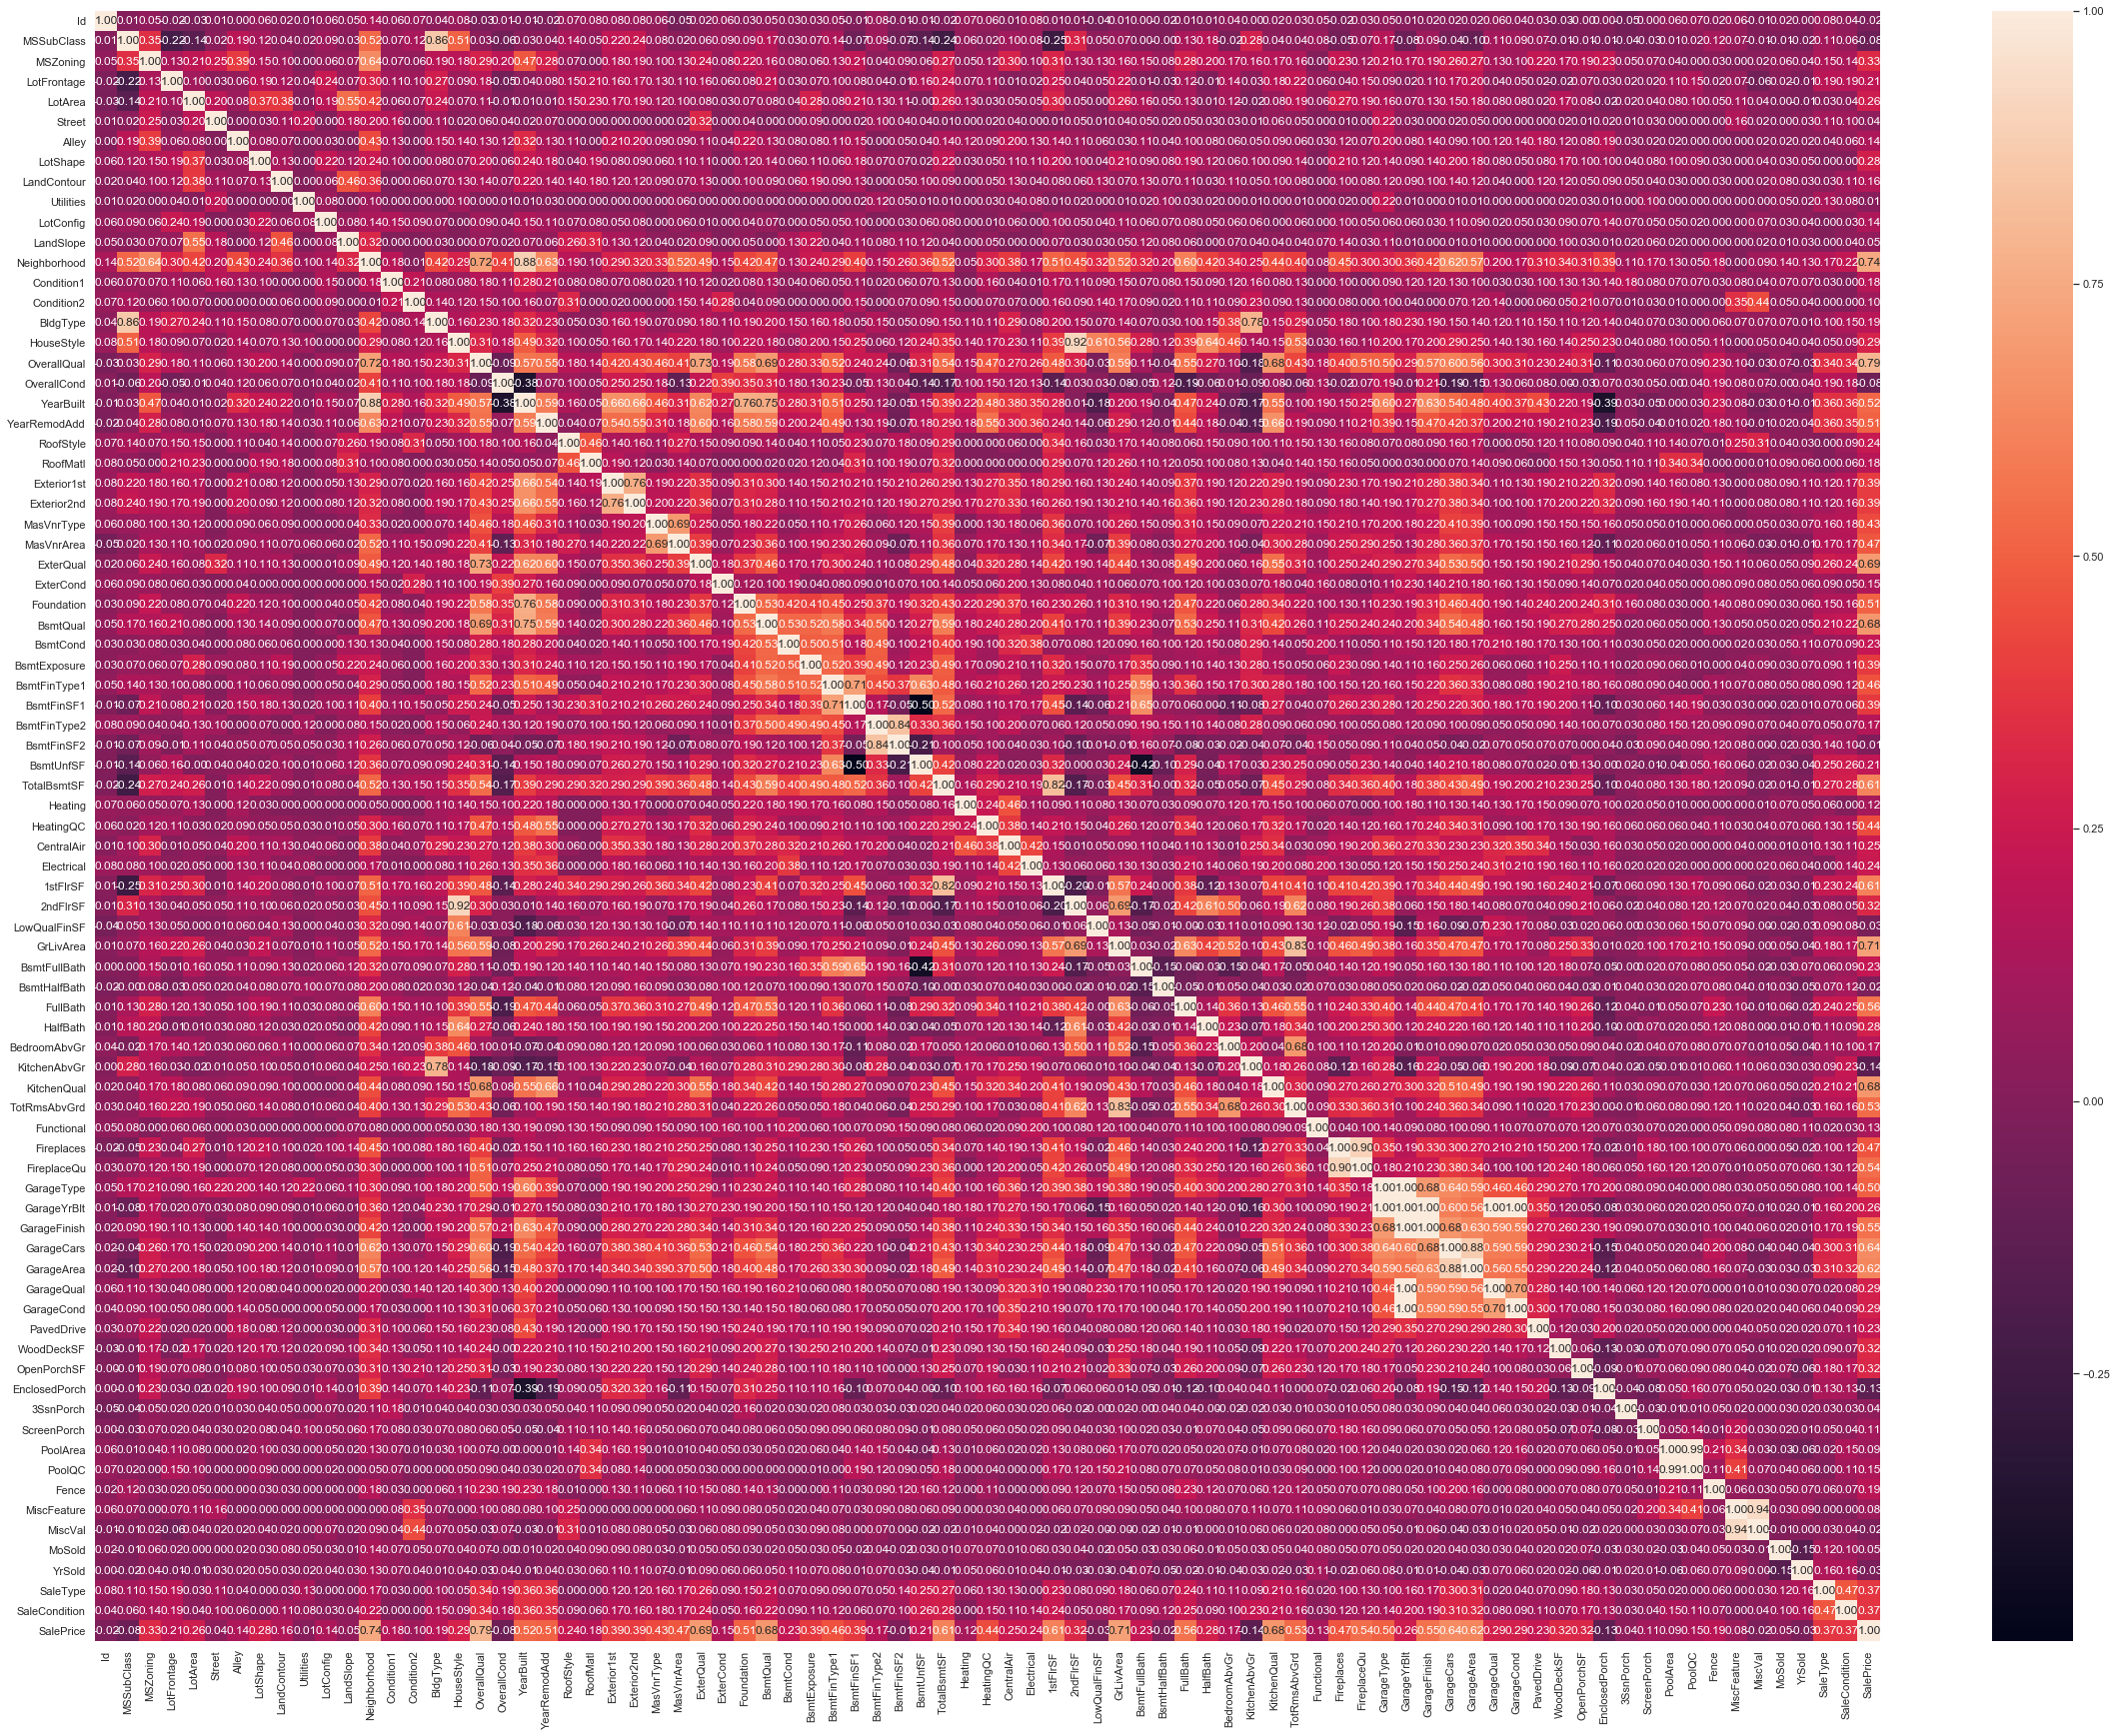

In [17]:
#Numeric features vs categorical features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features=[]
categorical_features=[]
for feature in data.columns:
    if data[feature].dtype in numeric_dtypes:
        numeric_features.append(feature)
    else:
        categorical_features.append(feature)
print('Numeric Feature',numeric_features)
print('Categorical Feature',categorical_features)
ax=nominal.associations(data, nominal_columns=categorical_features,figsize=(40, 30))

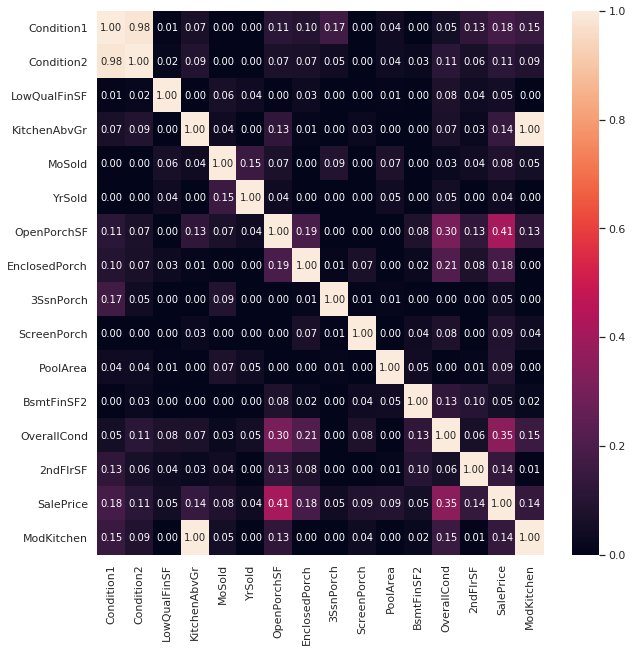

In [3]:
#Explore how much improvement would it be if converted to dummy variables
EDA=data.copy()
EDA=EDA[['Condition1','Condition2','LowQualFinSF','KitchenAbvGr','MoSold','YrSold',
         'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
         'BsmtFinSF2','OverallCond','2ndFlrSF','SalePrice']]
feature=['Condition1','Condition2','LowQualFinSF','KitchenAbvGr','MoSold','YrSold',
         'ModKitchen','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
         'PoolArea','BsmtFinSF2','OverallCond','2ndFlrSF']
EDA['ModKitchen']=[1 if x==1 else 0 for x in EDA['KitchenAbvGr']]
EDA['LowQualFinSF']=[1 if x>0 else 0 for x in EDA['LowQualFinSF']]
def change(row):
    if row['Condition1']==row['Condition2']:
        return 0
    else:
        return 1    
EDA['Condition2']=EDA.apply(change,axis=1)
EDA['OpenPorchSF']=[1 if x>0 else 0 for x in EDA['OpenPorchSF']]
EDA['EnclosedPorch']=[1 if x>0 else 0 for x in EDA['EnclosedPorch']]
EDA['3SsnPorch']=[1 if x>0 else 0 for x in EDA['3SsnPorch']]
EDA['ScreenPorch']=[1 if x>0 else 0 for x in EDA['ScreenPorch']]
EDA['PoolArea']=[1 if x>0 else 0 for x in EDA['PoolArea']]
EDA['BsmtFinSF2']=[1 if x>0 else 0 for x in EDA['BsmtFinSF2']]
EDA['2ndFlrSF']=[1 if x>0 else 0 for x in EDA['2ndFlrSF']]
ax=nominal.associations(EDA, nominal_columns=feature,figsize=(10, 10))

In [16]:
#combine training & testing data for data cleansing purpose
ori_y=data['SalePrice'].tolist()
data = data.drop(['Id','SalePrice'], axis=1)
data2 = pd.read_csv("test.csv")
Id=data2['Id']
data2 =data2.drop(['Id'], axis=1)
total_data=pd.concat([data,data2]).reset_index(drop=True)
total_data.shape

(2919, 79)

In [17]:
# dropping features that has little correlation with sales price
total_data=total_data.drop(['Utilities','MiscVal'], axis=1) 

In [18]:

#Apply changes to features that shows improvement
total_data['Condition2']=total_data.apply(change,axis=1)
total_data['KitchenAbvGr']=[1 if x==1 else 0 for x in total_data['KitchenAbvGr']]
total_data['OpenPorchSF']=[1 if x>0 else 0 for x in total_data['OpenPorchSF']]
total_data['EnclosedPorch']=[1 if x>0 else 0 for x in total_data['EnclosedPorch']]
total_data['BsmtFinSF2']=[1 if x>0 else 0 for x in total_data['BsmtFinSF2']]
total_data['LowQualFinSF']=[1 if x>0 else 0 for x in total_data['LowQualFinSF']]
total_data['PoolArea']=[1 if x>0 else 0 for x in total_data['PoolArea']]
total_data['3SsnPorch']=[1 if x>0 else 0 for x in total_data['3SsnPorch']]


In [19]:
#Check completeness of data
nulls=total_data.isnull()
null_list=nulls.sum()
null_list.shape
null_list=null_list.to_frame()
null_list[null_list[0]>0]

,0
MSZoning,4
LotFrontage,486
Alley,2721
Exterior1st,1
Exterior2nd,1
MasVnrType,24
MasVnrArea,23
BsmtQual,81
BsmtCond,82
BsmtExposure,82


In [20]:
# dropping features that has too many Nans
total_data=total_data.drop(['PoolQC'], axis=1) 

In [21]:
#fill with zeros
zero_list=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF','BsmtFullBath',
           'BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea','TotalBsmtSF']
for col in zero_list:
    total_data[col]=total_data[col].fillna(0)

#fill with None
none_list=['MasVnrType','BsmtQual','BsmtCond','FireplaceQu','GarageType',
          'GarageQual','GarageCond','Fence','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'GarageFinish','Alley','MiscFeature']
for col in none_list:
    total_data[col]=total_data[col].fillna('None')

#fill remaining nans with mode:
total_data['MSZoning']=total_data['MSZoning'].fillna('RL')
total_data['Exterior1st']=total_data['Exterior1st'].fillna('VinylSd')
total_data['Exterior2nd']=total_data['Exterior2nd'].fillna('VinylSd')
total_data['Electrical']=total_data['Electrical'].fillna('SBrkr')
total_data['KitchenQual']=total_data['KitchenQual'].fillna('TA')
total_data['Functional']=total_data['Functional'].fillna('Typ')
total_data['SaleType']=total_data['SaleType'].fillna('WD')

In [22]:
# Feature transformation
total_data['BsmtBath']=total_data['BsmtFullBath']+0.5*total_data['BsmtHalfBath']
total_data=total_data.drop(['BsmtFullBath','BsmtHalfBath'], axis=1) #Combining features

total_data['AbvBath']=total_data['FullBath']+0.5*total_data['HalfBath']
total_data=total_data.drop(['FullBath','HalfBath'], axis=1)  #Combining features



In [23]:
total_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,BsmtBath,AbvBath
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,0,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,1,0,0,0,0,None,None,2,2008,WD,Normal,1.0,2.5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,5,2007,WD,Normal,0.5,2.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,0,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,1,0,0,0,0,None,None,9,2008,WD,Normal,1.0,2.5
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,0,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,1,1,0,0,0,None,None,2,2006,WD,Abnorml,1.0,1.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,0,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,1,0,0,0,0,None,None,12,2008,WD,Normal,1.0,2.5


In [24]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features=[]
categorical_features=[]
for feature in total_data.columns:
    if total_data[feature].dtype in numeric_dtypes:
        numeric_features.append(feature)
    else:
        categorical_features.append(feature)
print(numeric_features,'\n\n',categorical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'BsmtBath', 'AbvBath'] 

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 

In [25]:
reclass=['Condition2','KitchenAbvGr','OpenPorchSF','EnclosedPorch',
         'LowQualFinSF','BsmtFinSF2','PoolArea','3SsnPorch']
dum_features=[]
for item in reclass:
    numeric_features.remove(item)
    dum_features.append(item)

reclass=['OverallCond','MoSold','YrSold']
for item in reclass:
    numeric_features.remove(item)
    categorical_features.append(item)

In [26]:
#Address skewness of numeric features
skewness=total_data[numeric_features].skew(axis=0)
skewness=skewness[(skewness>0.5)|(skewness<-0.5)]
skewfeat=skewness.index
print('Adjusted features:')
for item in skewfeat:
    print(item)
    total_data[item]=boxcox1p(total_data[item], stats.boxcox_normmax(total_data[item]+1))

Adjusted features:
MSSubClass
LotArea
YearBuilt
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
TotRmsAbvGrd
Fireplaces
GarageYrBlt
WoodDeckSF
ScreenPorch
BsmtBath


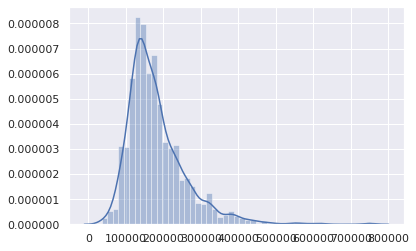

In [27]:
#Check the skewness of Saleprice
sb.distplot(ori_y)

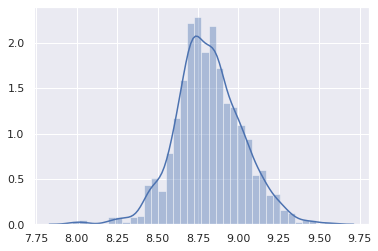

In [28]:
#Adjust the skewness of Saleprice
converter=stats.boxcox_normmax(ori_y)
train_y=boxcox1p(ori_y, converter)
sb.distplot(train_y)

In [29]:
#Dummy code categorical values and normalize numerical values
normalizer = StandardScaler()
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
normalizer.fit(total_data.iloc[:1460,:][numeric_features])
encoder.fit(total_data.iloc[:1460,:][categorical_features])
normalized_columns = normalizer.transform(total_data[numeric_features])
encoded_columns = encoder.transform(total_data[categorical_features])
exist_dum=total_data[dum_features].to_numpy()
processed_data = np.concatenate([normalized_columns, encoded_columns,exist_dum], axis=1)

In [30]:
processed_data.shape

(2919, 309)

### 2. Modeling

In [31]:
#Split training,dev, and testing
s = np.arange(1460)
np.random.shuffle(s)
Y=np.array(train_y)
train_data=processed_data[:1460,:]
training_data=train_data[s[200:]]
training_y=Y[s[200:]]
dev_data=train_data[s[:200]]
dev_y=Y[s[:200]]
testing_data=processed_data[1460:,:]

In [41]:
##Neural
NN=MLPRegressor(hidden_layer_sizes=(309,250,200,150,100,50,10,),
                                               activation='relu',
                                               solver='lbfgs',
                                               learning_rate='adaptive',
                                               max_iter=50000,
                                               learning_rate_init=0.01,
                                               alpha=10)
NN.fit(training_data,training_y)


MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(309, 250, 200, 150, 100, 50, 10),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [85]:
##Decission tree

#Selecting the best specification
depth = [5,10,12,15]
split = [10,15,20]

for i in depth:
    for j in split:
        reg1 = DecisionTreeRegressor(max_depth = i, min_samples_split = j)
        reg1.fit(training_data, training_y)
        predicted1 = reg1.predict(dev_data)
        print("depth = ", i, "split = ", j, "R^2 = ", "%.6f" % reg1.score(training_data, training_y))

#Re-run the model with the best specification        
DT = DecisionTreeRegressor(max_depth = 15, min_samples_split = 10)
DT.fit(training_data, training_y)
print()
result=DT.predict(dev_data)
print('Score is ',(np.sum(result-dev_y)**2/len(dev_y))**0.5)

#We are not using decission tree model in the ensemble model (below) because when tested, it scored worse that the following
#models, this was expected because Decission Trees do not generalize well on observations that are very different
#from the training data.

depth =  5 split =  10 R^2 =  0.845296
depth =  5 split =  15 R^2 =  0.845296
depth =  5 split =  20 R^2 =  0.844155
depth =  10 split =  10 R^2 =  0.963165
depth =  10 split =  15 R^2 =  0.950260
depth =  10 split =  20 R^2 =  0.941266
depth =  12 split =  10 R^2 =  0.969823
depth =  12 split =  15 R^2 =  0.956075
depth =  12 split =  20 R^2 =  0.945527
depth =  15 split =  10 R^2 =  0.972777
depth =  15 split =  15 R^2 =  0.958345
depth =  15 split =  20 R^2 =  0.946755

Score is  0.09515951093629835


In [42]:
#Define testing parameters
alphas_alt = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 
                3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 
                1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
kfolds = KFold(n_splits=12, shuffle=True)

In [57]:
#Ridge
RCV=RidgeCV(alphas=alphas_alt, cv=kfolds)
RCV.fit(training_data,training_y)

RidgeCV(alphas=array([14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5]),
        cv=KFold(n_splits=10, random_state=None, shuffle=True),
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [35]:
#ElasticNet
ECV=ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)
ECV.fit(training_data,training_y)

ElasticNetCV(alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007],
             copy_X=True,
             cv=KFold(n_splits=10, random_state=None, shuffle=True), eps=0.001,
             fit_intercept=True, l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1],
             max_iter=10000000.0, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [36]:
#Lasso
LCV=LassoCV(max_iter=1e7, alphas=alphas2, cv=kfolds)
LCV.fit(training_data,training_y)

LassoCV(alphas=[5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                0.0008],
        copy_X=True, cv=KFold(n_splits=10, random_state=None, shuffle=True),
        eps=0.001, fit_intercept=True, max_iter=10000000.0, n_alphas=100,
        n_jobs=None, normalize=False, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [205]:
# Gradient Boosting Model
best_score=[]
for n in range(50):
    GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                    max_features='sqrt', min_samples_leaf=15,
                                    min_samples_split=10, loss='huber', random_state=n)
    GBR.fit(training_data,training_y)
    result=GBR.predict(dev_data)
    best_score.append((np.sum(result-dev_y)**2/len(dev_y))**0.5)
best_score=np.array(best_score)
print('Best random_state= ',np.where(best_score==best_score.min()))

Best random_state=  (array([29]),)


In [37]:
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                    max_features='sqrt', min_samples_leaf=15,
                                    min_samples_split=10, loss='huber', random_state=29)

In [38]:
GBR.fit(training_data,training_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=29, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
# SVM Model
SVM=SVR(kernel='sigmoid', C= 20, epsilon= 0.008, gamma=0.0003)
SVM.fit(training_data,training_y)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.008, gamma=0.0003,
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
# Kernel Ridge Model(kaggle = 0.12559)
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(training_data,training_y)

KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
            kernel_params=None)

In [ ]:
# Random Forest Regressor(Kaggle = 0.14860)

RFR = RandomForestRegressor(n_estimators = 20000,  
                            n_jobs = -1)
RFR.fit(training_data,training_y)
#We are not using the Random Forest Regressor model in the ensemble model (below) because when tested, it scored worse that the following
#models, this was expected because Decission Trees do not generalize well on observations that are very different
#from the training data.

In [ ]:
# Light Gradient Boosting Regressor (kaggle = 0.12803)

import lightgbm as lgb

lightgbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lightgbm.fit(training_data,training_y)

In [ ]:
# BayesianRidge (kaggle = 0.12646)

bay = BayesianRidge()
bay.fit(training_data,training_y)

In [ ]:
#Ridge

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=64, max_iter= 1000000)
ridge.fit(training_data,training_y)

In [ ]:
#Model scores on dev data
models=[NN,ECV,RCV,LCV,GBR,SVM,KRR,RFR,lightgbm,bay,ridge]
for item in models:
    result=item.predict(dev_data)
    print('Score is ',(np.sum(result-dev_y)**2/len(dev_y))**0.5)

In [82]:
#Train Ensemble Model
Ensemble_data = np.empty(shape=(len(dev_y),11))

for n in range(11):
    predic=models[n].predict(dev_data)
    predic=predic.reshape(len(predic),1)
    Ensemble_data[:,n]=predic[:,0]

Ensemble=MLPRegressor(hidden_layer_sizes=(),
                                               activation='relu',
                                               solver='lbfgs',
                                               learning_rate='adaptive',
                                               max_iter=50000,tol=0.00001,
                                               learning_rate_init=0.001,
                                               alpha=0.1)
Ensemble.fit(Ensemble_data,dev_y)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(), learning_rate='adaptive',
             learning_rate_init=0.001, max_iter=50000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=1e-05,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
#Test Ensemble
Ensemble_data = np.empty(shape=(len(testing_data),11))

for n in range(11):
    predic=models[n].predict(testing_data)
    predic=predic.reshape(len(predic),1)
    Ensemble_data[:,n]=predic[:,0]

test_result=Ensemble.predict(Ensemble_data)

### 3. Submission for testing

In [87]:
test_result=inv_boxcox(test_result,converter)
output=pd.DataFrame(test_result)
output=output.rename(columns={0:'SalePrice'})
output['Id']=Id
output=output[['Id','SalePrice']]
output.to_csv('testresult.csv', index=False)
output.tail(5)

,Id,SalePrice
1454,2915,80712.116085
1455,2916,80712.116085
1456,2917,147380.529490
1457,2918,127197.386412
1458,2919,227019.953017


### 4. Practical Application

Our best error score is 0.1198 on the Leaderboard. What does it mean? We know that our RCV model scored the worst on the dev_data -- 0.1215. So let's use RCV model as an example.

Assume a real estate investment company wants to invest 200 properties. If they used our tool to predict market price and bid at a price 10% lower. How much profit would they make?

In [112]:
predic_result=RCV.predict(dev_data)

In [113]:
#Total portfolio amount
total_invest=inv_boxcox(dev_y,converter)
total_invest.sum()

37025296.00000001

In [114]:
#Total prediction
total_predic=inv_boxcox(predic_result,converter)
total_predic.sum()

35883931.08109924

In [115]:
#Percentage of Variance
round((total_invest.sum()-total_predic.sum())/total_invest.sum()*100,2)

3.08

In [116]:
#Profit 
round((total_invest.sum()-total_predic.sum()*0.9)/total_invest.sum()*100,2)

12.77

The model prediction is very accurate, on average only 3.08% lower than the actual market price.
That means, if the real estate company would pocket an immediate gain of 12.77%. 

The lower the error score, the more accurate the prediction. our model produced an error rate less than +/- 3.08%.
Which means overall the model can reliably predict market price, thus placing investors ahead of the game knowing profit even before investment. 